In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import  plotly.express as px
%matplotlib inline

pd.set_option('display.float_format',lambda x: '%.3f' %x)

In [2]:
df=pd.read_csv("Uber_Data.csv")
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,0.000,0.000,Y
1,01-01-2015 01:00,Brooklyn,1519,5.000,10.000,NaN,7.000,1023.500,0.000,0.000,0.000,0.000,Y
2,01-01-2015 01:00,EWR,0,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,0.000,0.000,Y
3,01-01-2015 01:00,Manhattan,5258,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,0.000,0.000,Y
4,01-01-2015 01:00,Queens,405,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,0.000,0.000,Y


In [3]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [3]:
df[df['temp'].isnull()==True]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
1,01-01-2015 01:00,Brooklyn,1519,5.000,10.000,NaN,7.000,1023.500,0.000,0.000,0.000,0.000,Y
8,01-01-2015 02:00,Brooklyn,1229,3.000,10.000,NaN,6.000,1023.000,0.000,0.000,0.000,0.000,Y
15,01-01-2015 03:00,Brooklyn,1601,5.000,10.000,NaN,8.000,1022.300,0.000,0.000,0.000,0.000,Y
22,01-01-2015 04:00,Brooklyn,1390,5.000,10.000,NaN,9.000,1022.000,0.000,0.000,0.000,0.000,Y
29,01-01-2015 05:00,Brooklyn,759,5.000,10.000,NaN,9.000,1021.800,0.000,0.000,0.000,0.000,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,15-01-2015 19:00,Brooklyn,594,5.000,10.000,NaN,13.000,1016.200,0.000,0.000,0.000,0.000,N
2340,15-01-2015 20:00,Brooklyn,620,5.000,10.000,NaN,13.000,1015.500,0.000,0.000,0.000,0.000,N
2347,15-01-2015 21:00,Brooklyn,607,3.000,10.000,NaN,14.000,1015.400,0.000,0.000,0.000,0.000,N
2354,15-01-2015 22:00,Brooklyn,648,9.000,10.000,NaN,14.000,1015.400,0.000,0.000,0.000,0.000,N


In [6]:
df.groupby(['borough'])['temp'].mean()

borough
Bronx           47.489
Brooklyn        49.139
EWR             47.489
Manhattan       47.489
Queens          47.489
Staten Island   47.489
Name: temp, dtype: float64

In [4]:
df['temp']=df['temp'].fillna(value=df.groupby(['borough'])['temp'].transform('mean'))

In [5]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [6]:
pd.DataFrame({"Count":df.isnull().sum()[df.isnull().sum()>0],"Percentage":(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
borough,3043,10.457


In [10]:
df.isnull().sum()[df.isnull().sum()>0]

borough    3043
dtype: int64

In [7]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,0.000,0.000,Y
1,01-01-2015 01:00,Brooklyn,1519,5.000,10.000,49.139,7.000,1023.500,0.000,0.000,0.000,0.000,Y
2,01-01-2015 01:00,EWR,0,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,0.000,0.000,Y
3,01-01-2015 01:00,Manhattan,5258,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,0.000,0.000,Y
4,01-01-2015 01:00,Queens,405,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,0.000,0.000,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [9]:
df['pickup_dt']=pd.to_datetime(df['pickup_dt'],format='mixed',dayfirst=True)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pickup_dt', ylabel='pickups'>

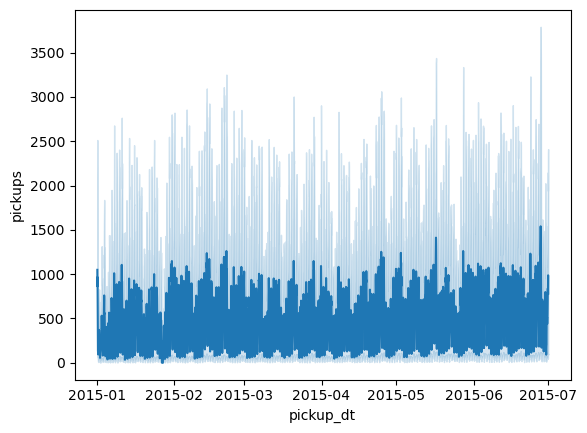

In [24]:
df.shape

(29101, 13)

In [12]:
missing_values=pd.DataFrame(df.isnull().sum())
missing_values.index



Index(['pickup_dt', 'borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp',
       'pcp01', 'pcp06', 'pcp24', 'sd', 'hday'],
      dtype='object')

<Axes: xlabel='pickups'>

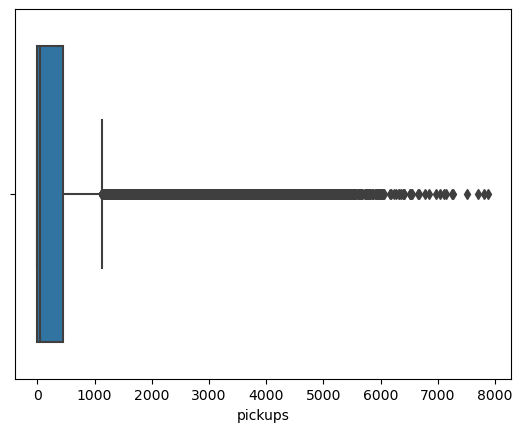

In [13]:
sns.boxplot(data=df,x='pickups')

D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pickups', ylabel='Count'>

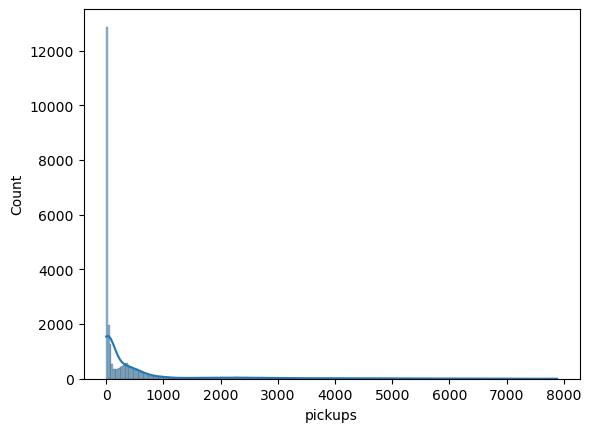

In [18]:
sns.histplot(data=df,x='pickups',kde=True)

<Axes: xlabel='vsb'>

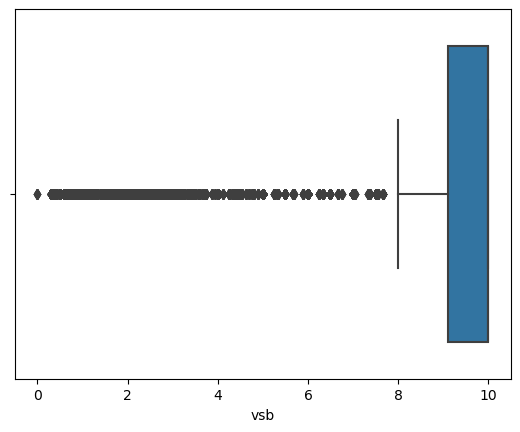

In [17]:
sns.boxplot(data=df,x=df['vsb'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [19]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [21]:
df['borough']=df['borough'].fillna(value='unknown')

In [22]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'unknown'], dtype=object)

In [23]:
df.isnull().sum()

pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
dtype: int64

In [30]:
# Extracting date parts from pickup date
df['start_year'] = df.pickup_dt.dt.year # extracting the year from the date
df['start_month'] = df.pickup_dt.dt.month_name() # extracting the month name from the date
df['start_hour'] = df.pickup_dt.dt.hour # extracting the hour from the time
df['start_day'] = df.pickup_dt.dt.day # extracting the day from the date
df[''] = df.pickup_dt.dt.day_name() # extracting the day of the week from the date

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pickup_dt    29101 non-null  datetime64[ns]
 1   borough      29101 non-null  object        
 2   pickups      29101 non-null  int64         
 3   spd          29101 non-null  float64       
 4   vsb          29101 non-null  float64       
 5   temp         29101 non-null  float64       
 6   dewp         29101 non-null  float64       
 7   slp          29101 non-null  float64       
 8   pcp01        29101 non-null  float64       
 9   pcp06        29101 non-null  float64       
 10  pcp24        29101 non-null  float64       
 11  sd           29101 non-null  float64       
 12  hday         29101 non-null  object        
 13  year         29101 non-null  int32         
 14  month        29101 non-null  int32         
 15  day          29101 non-null  int32         
 16  star

In [32]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,...,sd,hday,year,month,day,start_year,start_month,start_hour,start_day,week_day
0,2015-01-01 01:00:00,Bronx,152,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,...,0.000,Y,2015,1,1,2015,January,1,1,Thursday
1,2015-01-01 01:00:00,Brooklyn,1519,5.000,10.000,49.139,7.000,1023.500,0.000,0.000,...,0.000,Y,2015,1,1,2015,January,1,1,Thursday
2,2015-01-01 01:00:00,EWR,0,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,...,0.000,Y,2015,1,1,2015,January,1,1,Thursday
3,2015-01-01 01:00:00,Manhattan,5258,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,...,0.000,Y,2015,1,1,2015,January,1,1,Thursday
4,2015-01-01 01:00:00,Queens,405,5.000,10.000,30.000,7.000,1023.500,0.000,0.000,...,0.000,Y,2015,1,1,2015,January,1,1,Thursday


In [34]:
fig=px.histogram(data_frame=df,x=df['week_day'])
fig.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pickup_dt    29101 non-null  datetime64[ns]
 1   borough      29101 non-null  object        
 2   pickups      29101 non-null  int64         
 3   spd          29101 non-null  float64       
 4   vsb          29101 non-null  float64       
 5   temp         29101 non-null  float64       
 6   dewp         29101 non-null  float64       
 7   slp          29101 non-null  float64       
 8   pcp01        29101 non-null  float64       
 9   pcp06        29101 non-null  float64       
 10  pcp24        29101 non-null  float64       
 11  sd           29101 non-null  float64       
 12  hday         29101 non-null  object        
 13  year         29101 non-null  int32         
 14  month        29101 non-null  int32         
 15  day          29101 non-null  int32         
 16  star

<Axes: xlabel='week_day', ylabel='count'>

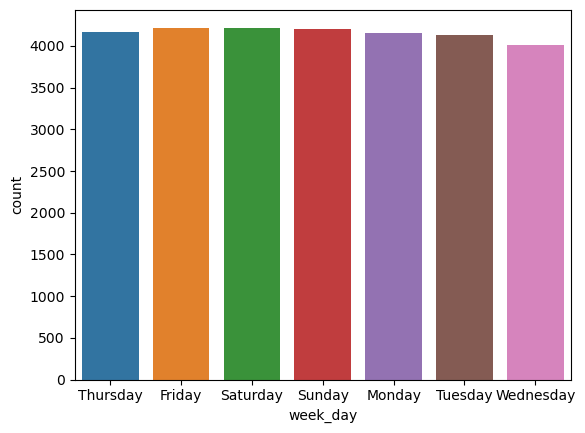

In [37]:
sns.countplot(data=df,x='week_day')

D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='pickups', ylabel='week_day'>

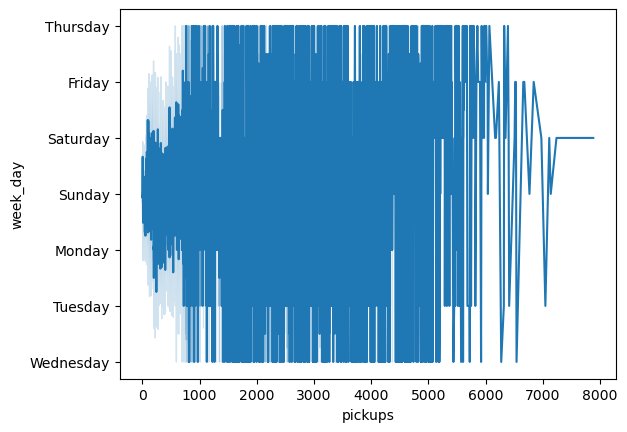

In [38]:
sns.lineplot(data=df,x='pickups',y='week_day')